# Trabajo Práctico 4 - Machine Learning
*Felicitas marolda*

## Parte 1: Clustering de datos
Para el dataset clustering.csv realizar los siguientes análisis:

a) Implementar el algoritmo K-means y determinar la cantidad de clusters con el método de
“ganancias decrecientes” (graficar L vs. K, y elegir un valor K donde al aumentar K deje
de reducir significativamente L, donde L es la suma de las distancias). Graficar el conjunto
de datos xi mostrando a qué cluster pertenece cada dato (usando colores/marcadores
distintos para cada cluster) y también mostrar el centroide de cada cluster.

In [106]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

import src.algoritmos as alg
import src.auxiliares as aux
import src.preprocessing as pp

In [107]:
np.random.seed(241204)

In [ ]:
# cargamos datasets
clustering_csv = pd.read_csv('data/clustering.csv')

# drop primera columna
clustering_csv = clustering_csv.drop(clustering_csv.columns[0], axis=1)

# min max scaling
clustering_csv = pp.min_max(clustering_csv)


          A         B
0  0.816105  0.644565
1  0.875655  0.608406
2  0.931723  0.606556
3  0.846996  0.640054
4  0.849459  0.597697
5  0.821232  0.620785
6  0.873245  0.632648
7  0.884623  0.640627
8  0.807800  0.643711
9  0.833640  0.562978


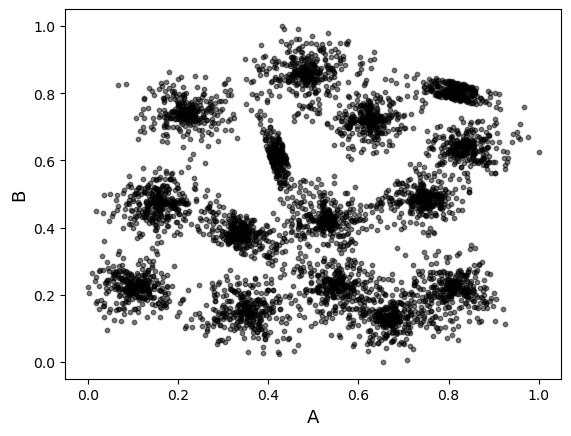

In [118]:
# primeras 10 filas
print(clustering_csv.head(10))

# graficamos
fs = 13
plt.scatter(clustering_csv['A'], clustering_csv['B'], s=10, c='black', alpha=0.5)
plt.xlabel('A', fontsize=fs)
plt.ylabel('B', fontsize=fs)
plt.show()

In [ ]:
# pasamos a numpy
clustering = clustering_csv.values

In [120]:
importlib.reload(alg)
importlib.reload(aux)

k_values = range(1,30)

distances_k = []
k_info = {}
for k in k_values:
    centroids, labels = alg.k_means(clustering, k)
    distances = aux.get_distances_sum(clustering, labels, centroids)
    k_info[k] = {
        'centroids': centroids,
        'labels': labels,
        'distances': distances
    }
    distances_k.append(distances)

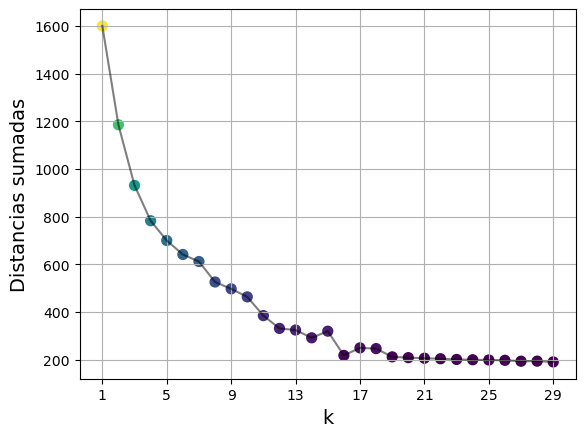

In [121]:
importlib.reload(aux)
aux.graph(k_values, distances_k, 'k', 'Distancias sumadas')

Vemos como se ven las proyecciones en 7, 11 y 17

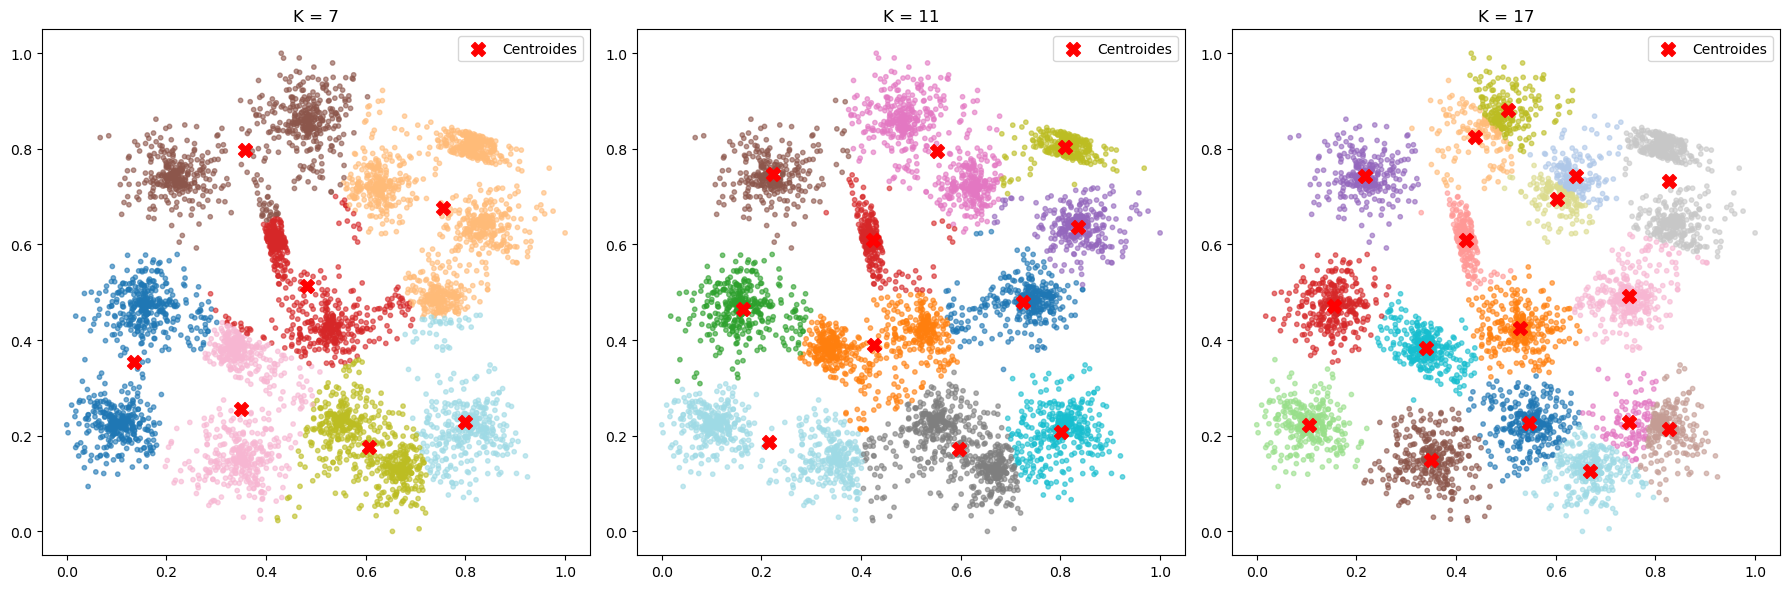

In [122]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, k in enumerate([7, 11, 17]):
    labels_k = k_info[k]['labels']
    centroids_k = k_info[k]['centroids']
    axs[idx].scatter(clustering[:, 0], clustering[:, 1], c=labels_k, cmap='tab20', s=10, alpha=0.6)
    axs[idx].scatter(centroids_k[:, 0], centroids_k[:, 1], c='red', marker='X', s=100, label='Centroides')
    axs[idx].set_title(f'K = {k}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

b) Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que
en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una
corrida de K-means.

In [123]:
importlib.reload(alg)
importlib.reload(aux)

k_possible = range(1,20,2)
distances_k_gmm = []
k_info_gmm = {}
for k in k_possible:
    print(f'k = {k}')
    medias, covs, weights, responsabilidades, log_like_hist, labels_gmm = alg.GMM(
        clustering,
        k=k,
        centroids_init=k_info[k]['centroids'],
    )
    distances = aux.get_distances_sum(clustering, labels_gmm, medias)
    k_info_gmm[k] = {
        'centroids': medias,
        'covs': covs,
        'weights': weights,
        'responsabilidades': responsabilidades,
        'log_like_hist': log_like_hist,
        'labels_gmm': labels_gmm
    }
    distances_k_gmm.append(distances)

k = 1
k = 3
k = 5
k = 7
k = 9
k = 11
k = 13
k = 15
k = 17
k = 19


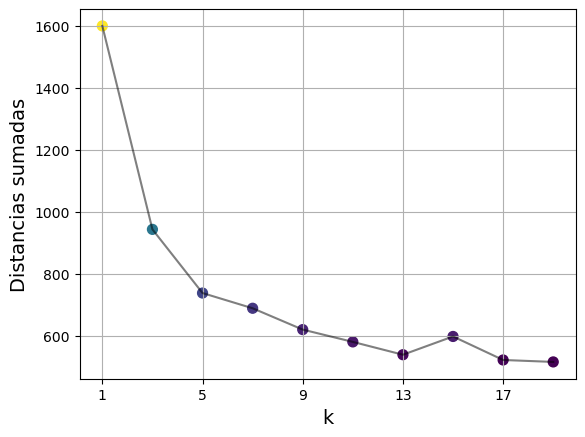

In [124]:
importlib.reload(aux)
aux.graph(k_possible, distances_k_gmm, 'k', 'Distancias sumadas')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


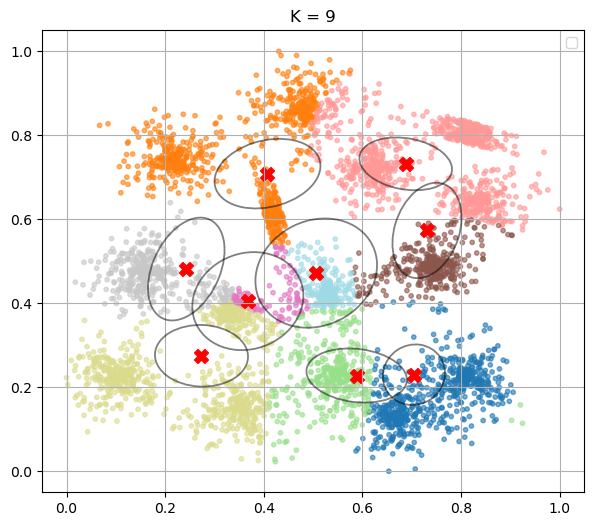

In [134]:
importlib.reload(aux)
k = 9
centroids = k_info_gmm[k]['centroids']
covs = k_info_gmm[k]['covs']
weights = k_info_gmm[k]['weights']
responsabilidades = k_info_gmm[k]['responsabilidades']
log_like_hist = k_info_gmm[k]['log_like_hist']
labels_gmm = k_info_gmm[k]['labels_gmm']

fig,ax = plt.subplots(1, 1, figsize=(7, 6))
ax.scatter(clustering[:, 0], clustering[:, 1], c=labels_gmm, cmap='tab20', s=10, alpha=0.6)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
for i in range(len(centroids)):
    aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax, scale=0.6)
    # aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax)
ax.set_title(f'K = {k}')
ax.legend()
plt.grid()
plt.show()

c) Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto
de variar los parámetros ϵ (radio de la vecindad) y K (mínimo número de puntos en
una zona densa). Luego, elegir una combinación razonable de ϵ y K y graficar los datos
mostrando a qué cluster pertenece cada uno, utilizando colores/marcadores distintos para
cada cluster/ruido.

In [145]:
importlib.reload(alg)
importlib.reload(aux)

combinations = [[0.01, 1], [0.1, 2], [0.1, 10], [0.2, 3], [0.3, 4], [0.3, 9], [0.4, 5], [0.5, 6], [0.5, 2], [0.8, 7]]

# grid search
distances_db = []
info_db = {}
for comb in combinations:
    eps, k = comb
    print(f'eps = {eps}, k = {k}')
    labels_db, joining_db = alg.DBSCAN(clustering, eps=eps, k=k)
    centroids_db = aux.get_centroids(clustering, labels_db)
    distances = aux.get_distances_sum(clustering, labels_db, centroids_db)
    print(" "*10, f'distances = {distances}')
    distances_db.append(distances)
    info_db[(eps, k)] = {
        'labels': labels_db,
        'joining': joining_db,
        'distances': distances
    }

eps = 0.01, k = 1
           distances = 98.21547648321587
eps = 0.1, k = 2
           distances = 1599.943493034772
eps = 0.1, k = 10
           distances = 1599.943493034772
eps = 0.2, k = 3


KeyboardInterrupt: 

las distancias dejan de tener sentido porque hay ruido que no se toma en cuenta.

In [149]:
importlib.reload(alg)
params_a = [0.01, 10]
print(f'eps = {params_a[0]}, k = {params_a[1]}')
labels_db_a, to_join_points_a = alg.DBSCAN(clustering, eps=params_a[0], k=params_a[1])

params_b = [0.03, 10]
print(f'eps = {params_b[0]}, k = {params_b[1]}')
labels_db_b, to_join_points_b = alg.DBSCAN(clustering, eps=params_b[0], k=params_b[1])

params_c = [0.1, 4]
print(f'eps = {params_c[0]}, k = {params_c[1]}')
labels_db_c, to_join_points_c = alg.DBSCAN(clustering, eps=params_c[0], k=params_c[1])

params_d = [0.1, 2]
print(f'eps = {params_d[0]}, k = {params_d[1]}')
labels_db_d, to_join_points_d = alg.DBSCAN(clustering, eps=params_d[0], k=params_d[1])


eps = 0.01, k = 10
eps = 0.03, k = 10
eps = 0.1, k = 4
eps = 0.1, k = 2


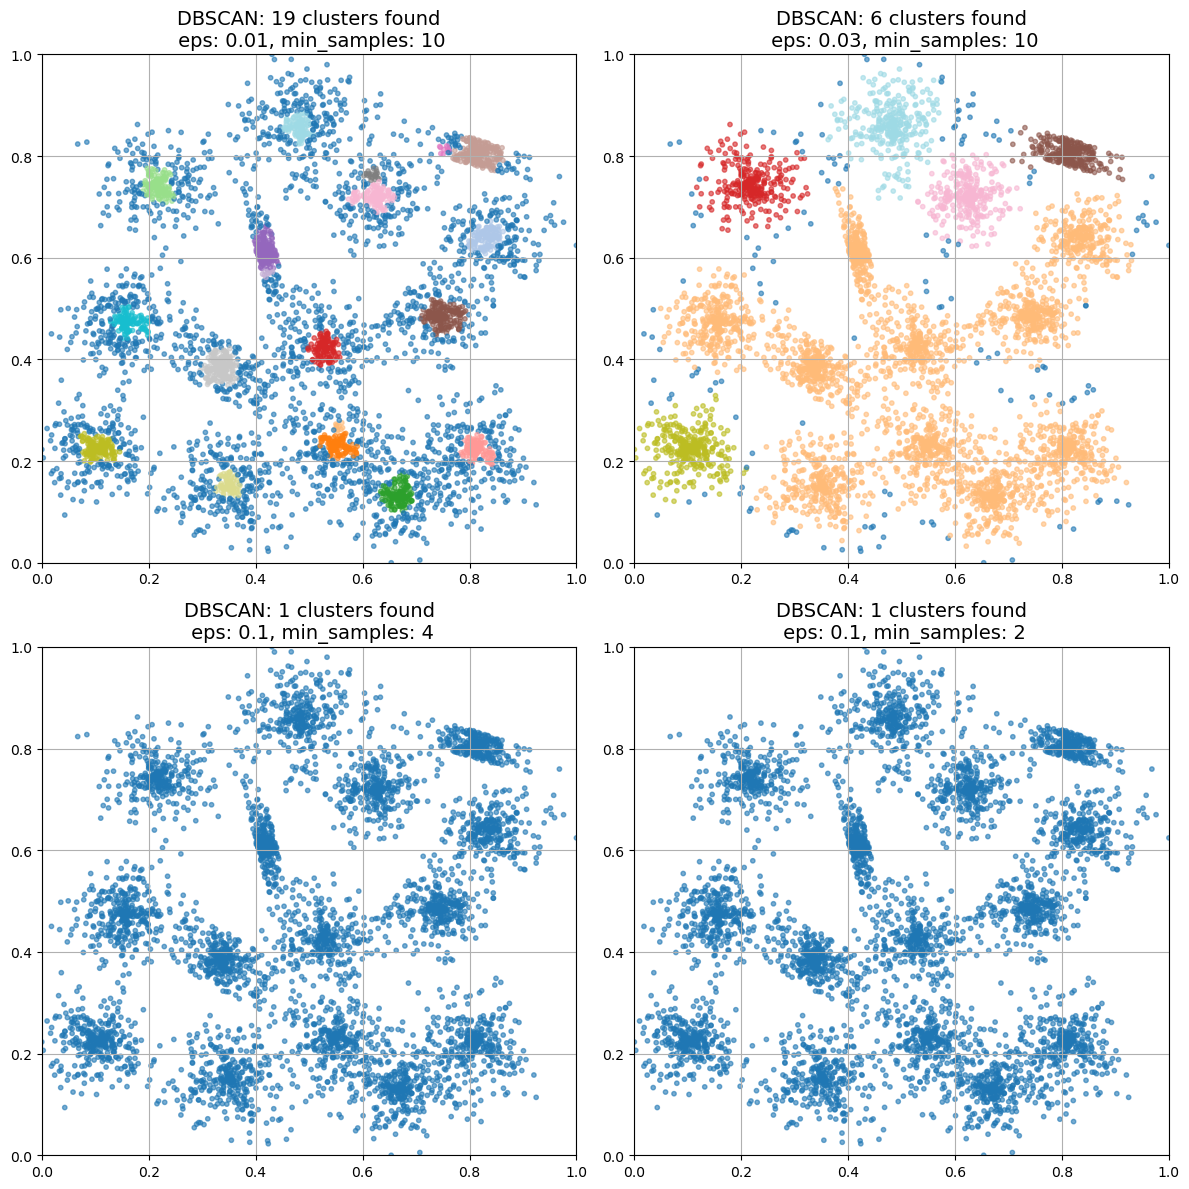

In [150]:
importlib.reload(aux)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
aux.sub_plot(clustering, axs, 0, 0, labels_db_a, params_a)
aux.sub_plot(clustering, axs, 0, 1, labels_db_b, params_b)
aux.sub_plot(clustering, axs, 1, 0, labels_db_c, params_c)
aux.sub_plot(clustering, axs, 1, 1, labels_db_d, params_d)
plt.tight_layout()
plt.show()

# Problema 2: Reducción de dimensionalidad

Este problema se basará en el dataset MNIST_dataset.csv,
que contiene representaciones tabulares de imágenes de dígitos del 0 al 9. Originalmente, cada
imagen tiene una resolución de 28x28 píxeles en escala de grises. En este conjunto de datos,
cada imagen se representa como una fila de 784 (28x28) valores, donde cada valor representa
la intensidad de gris de un píxel en la imagen.

In [ ]:
mnist_csv = pd.read_csv('data/MNIST_dataset.csv')
mnist = mnist_csv.values

a) Implementar Principal Component Analysis (PCA) y aplicarlo al conjunto de datos.
Graficar cómo varía el error cuadrático medio de reconstrucción sobre el conjunto de
datos en función de la cantidad de componentes principales utilizadas.